In [71]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

import regex as re
import seaborn as sns
import os

In [ ]:
os.chdir("/Users/avascharfstein/Desktop/Dartmouth/mds-final")

In [18]:
df = pd.read_csv("data/df_cleaned.csv")
stats_df = pd.read_csv("data/df_progress.csv")

In [4]:
with open('data/specific_stats.pkl', 'rb') as f:
    specific_stats = pkl.load(f)

with open('data/overall_stats.pkl', 'rb') as f:
    overall_stats = pkl.load(f)

In [6]:
h = "_home"
a = "_away"

Discrepancies between home and away?

In [12]:
print(sum(stats_df['rs_home']>stats_df['rs_away'])/len(stats_df)) # rank/seed not related to home/away designation

0.4846560846560847


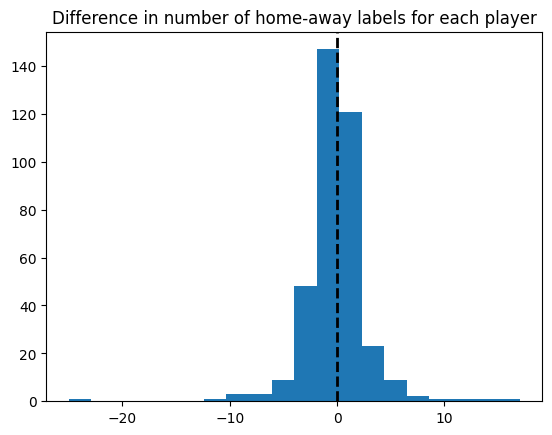

In [15]:
all_names = pd.DataFrame(pd.concat([df['name_home'], df['name_away']]), columns = ['name'])
all_names['home'] = [1 if x < len(df) else 0 for x in range(len(all_names))]
all_names['rank'] = pd.concat([df['rs_home'], df['rs_away']])
ranks = all_names.groupby('name')['rank'].mean().round()
all_names = all_names.drop(columns = ['rank'])
counts = pd.DataFrame(all_names.groupby('name').value_counts()).reset_index()
counts = counts.pivot(index='name', columns='home', values='count')
counts = counts.fillna(0)
counts['count_difference'] = counts[1] - counts[0]
plt.hist(counts['count_difference'], bins = 20)
plt.axvline(np.mean(counts['count_difference']), linestyle='dashed', color='black', linewidth=2)
plt.title("Difference in number of home-away labels for each player");

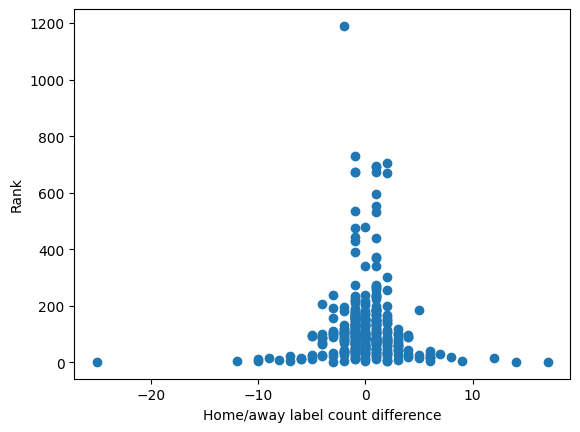

In [16]:
counts['ranks'] = ranks
plt.scatter(counts['count_difference'], counts['ranks'])
plt.xlabel("Home/away label count difference")
plt.ylabel("Rank");

# This suggests that players with higher rank are more likely to consistently be labeled as home or away player, compared to lower ranked players

In [24]:
df['rs_diff'] = df['rs'+h]-df['rs'+a] # Is home player ranked higher than away

In [30]:
columns_to_swap = []
for col in df.columns:
    if "home" in col:
        columns_to_swap.append(re.match(r"^(.*?)\_home",col).group(1))

In [31]:
columns_to_swap.remove('win')

In [37]:
swap_df = df[df['rs_diff']>0]
swap_df
# Subsetting df to dataframe when home is NOT the better ranked player, that is home rs > away rs, home rs - away rs > 0

,event_id,player_id_home,name_home,seed_home,aces_home,backhand_errors_home,backhand_unforced_errors_home,backhand_winners_home,breakpoints_won_home,double_faults_home,...,avg_set_length,avg_game_length,avg_points_per_game,match_length,rs_home,rs_away,avg_set_diff,avg_set_games,sets,rs_diff
1,sr:sport_event:42023447,sr:competitor:41355,"Bogdan, Ana",1,6,12,7,7,3,2,...,72.141667,5.549359,6.769231,144.283333,61.0,15.0,1.000000,13.000000,2,46.0
3,sr:sport_event:42023459,sr:competitor:99131,"Bucsa, Cristina",1,6,34,15,10,6,4,...,54.772222,5.134896,7.187500,164.316667,77.0,70.0,0.666667,10.666667,3,7.0
5,sr:sport_event:42023471,sr:competitor:41877,"Yuan, Yue",1,5,10,9,15,2,0,...,53.100000,4.978125,6.843750,159.300000,106.0,19.0,-0.666667,10.666667,3,87.0
7,sr:sport_event:42023485,sr:competitor:18430,"Strycova, Barbora",1,5,9,8,3,4,2,...,42.183333,4.440351,6.157895,84.366667,677.0,92.0,3.500000,9.500000,2,585.0
11,sr:sport_event:42023431,sr:competitor:343160,"Volynets, Katie",1,5,13,4,1,2,4,...,42.583333,4.482456,6.380952,85.166667,123.0,5.0,-2.500000,9.500000,2,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,sr:sport_event:43216869,sr:competitor:352776,"Draper, Jack",1,18,16,13,8,2,5,...,41.229167,4.457207,6.054054,164.916667,118.0,8.0,-1.250000,9.250000,4,110.0
937,sr:sport_event:43216937,sr:competitor:57163,"Zverev, Alexander",0,16,28,13,10,6,6,...,56.200000,6.108696,7.000000,281.000000,12.0,6.0,0.800000,9.200000,5,6.0
938,sr:sport_event:43216853,sr:competitor:136042,"Fritz, Taylor",0,8,12,24,5,2,2,...,51.900000,5.766667,6.777778,155.700000,9.0,2.0,-3.000000,9.000000,3,7.0
942,sr:sport_event:43216849,sr:competitor:808628,"Shelton, Ben",1,5,20,11,4,2,5,...,53.683333,5.368333,6.700000,161.050000,46.0,2.0,-2.666667,10.000000,3,44.0


In [38]:
# Loop through the columns and swap values for corresponding pairs

for col_prefix in columns_to_swap:
    col_home = f'{col_prefix}_home'
    col_away = f'{col_prefix}_away'

    # Swap values using a temporary variable
    swap_df.loc[:, [col_home, col_away]] = swap_df.loc[:, [col_away, col_home]].values

    # Drop the temporary column
    #swap_df.drop(columns=[f'tmp_{col_prefix}'], inplace=True)

# Display the updated DataFrame
print(swap_df)

                    event_id        player_id_home            name_home  \
1    sr:sport_event:42023447  sr:competitor:128584  Samsonova, Liudmila   
3    sr:sport_event:42023459  sr:competitor:252223   Rakhimova, Kamilla   
5    sr:sport_event:42023471   sr:competitor:19017   Azarenka, Victoria   
7    sr:sport_event:42023485   sr:competitor:41278     Zanevska, Maryna   
11   sr:sport_event:42023431   sr:competitor:42339     Garcia, Caroline   
..                       ...                   ...                  ...   
935  sr:sport_event:43216869  sr:competitor:106755       Rublev, Andrey   
937  sr:sport_event:43216937  sr:competitor:225050       Sinner, Jannik   
938  sr:sport_event:43216853   sr:competitor:14882      Djokovic, Novak   
942  sr:sport_event:43216849   sr:competitor:14882      Djokovic, Novak   
944  sr:sport_event:43216851   sr:competitor:14882      Djokovic, Novak   

     seed_home  aces_home  backhand_errors_home  \
1            0          5                    14 

In [45]:
#swap_df.loc[:,'rs_diff'] = swap_df.loc[:,'rs'+h]-swap_df.loc[:,'rs'+a]
df[df['rs_diff']>0] = swap_df[swap_df['rs_diff']<0]

In [47]:
df[df['rs_diff']<0] # Now rs home - rs away will always be negative, home player is always a higher rank

,event_id,player_id_home,name_home,seed_home,aces_home,backhand_errors_home,backhand_unforced_errors_home,backhand_winners_home,breakpoints_won_home,double_faults_home,...,avg_set_length,avg_game_length,avg_points_per_game,match_length,rs_home,rs_away,avg_set_diff,avg_set_games,sets,rs_diff
0,sr:sport_event:42023445,sr:competitor:66968,"Kudermetova, Veronika",0,14,13,8,9,1,1,...,50.983333,4.433333,6.913043,101.966667,12.0,101.0,1.500000,11.500000,2,-89.0
1,sr:sport_event:42023447,sr:competitor:128584,"Samsonova, Liudmila",0,5,14,21,11,3,3,...,72.141667,5.549359,6.769231,144.283333,15.0,61.0,1.000000,13.000000,2,-46.0
2,sr:sport_event:42023449,sr:competitor:256547,"Parks, Alycia",1,5,8,17,3,4,5,...,50.866667,5.354386,7.210526,101.733333,47.0,87.0,2.500000,9.500000,2,-40.0
3,sr:sport_event:42023459,sr:competitor:252223,"Rakhimova, Kamilla",1,2,24,16,7,5,6,...,54.772222,5.134896,7.187500,164.316667,70.0,77.0,0.666667,10.666667,3,-7.0
4,sr:sport_event:42023461,sr:competitor:44834,"Pegula, Jessica",0,3,20,14,11,5,3,...,46.783333,4.678333,6.600000,140.350000,4.0,44.0,2.000000,10.000000,3,-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,sr:sport_event:43216857,sr:competitor:163504,"Medvedev, Daniil",0,8,10,11,7,9,9,...,55.894444,5.782184,6.827586,167.683333,3.0,8.0,2.333333,9.666667,3,-5.0
941,sr:sport_event:43216863,sr:competitor:407573,"Alcaraz, Carlos",0,3,5,10,12,4,3,...,50.033333,5.559259,6.444444,150.100000,1.0,12.0,3.000000,9.000000,3,-11.0
942,sr:sport_event:43216849,sr:competitor:14882,"Djokovic, Novak",0,5,16,6,7,5,3,...,53.683333,5.368333,6.700000,161.050000,2.0,46.0,-2.666667,10.000000,3,-44.0
943,sr:sport_event:43216855,sr:competitor:407573,"Alcaraz, Carlos",0,0,25,14,12,1,0,...,49.737500,5.235526,6.894737,198.950000,1.0,3.0,-1.500000,9.500000,4,-2.0


In [67]:
df['upset'] = ~df['win'+h]

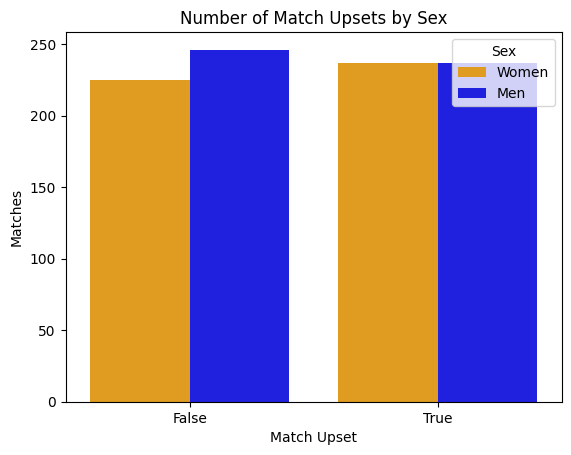

In [83]:
upset_breakdown = pd.DataFrame(df.groupby('men')['upset'].value_counts()).reset_index()
upset_breakdown['men'] = upset_breakdown['men'].apply(lambda x: "Men" if x==1 else "Women")
fig, ax = plt.subplots()
sns.barplot(ax = ax, data = upset_breakdown, x = 'upset', y = 'count', hue = 'men', palette = {'Men':'blue','Women':'orange'})
plt.xlabel("Match Upset")
plt.ylabel("Matches")
plt.title("Number of Match Upsets by Sex")
plt.legend(title = 'Sex')
plt.show()

In [86]:
df.to_csv("data/df_relabeled.csv", index = False)